In [11]:
simple_seed = 10
def random1(min_val, max_val):
    global simple_seed
    simple_seed = simple_seed * 11 + 7
    return min_val + simple_seed  % (max_val - min_val)

In [12]:
xorshift_seed = 11
def random2(min_val, max_val):
    global xorshift_seed
    xorshift_seed ^= xorshift_seed << 13
    xorshift_seed ^= xorshift_seed >> 17
    xorshift_seed ^= xorshift_seed << 5
    xorshift_seed %= int("ffffffff", 16)
    return min_val + xorshift_seed % (max_val - min_val)

In [13]:
n = [100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000]
s1, s2, s3, s4, s5, s6, s7, s8, s9, s10 = [], [], [], [], [], [], [], [], [], []
x1, x2, x3, x4, x5, x6, x7, x8, x9, x10 = [], [], [], [], [], [], [], [], [], []
simple = [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10]
xor = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10]
for i in range(10):
    for j in range(n[i]):
        simple[i].append(random1(0, 10000))
        xor[i].append(random2(0, 10000))  

In [14]:
mean_simple = []
mean_xor = []
for i in range(10):
    sum_simple = 0
    sum_xor = 0
    for j in range(n[i]):
        sum_simple += simple[i][j]
        sum_xor += xor[i][j]
    sum_simple /= n[i]
    sum_xor /= n[i]
    mean_simple.append(sum_simple)
    mean_xor.append(sum_xor)
print(mean_simple)
print(mean_xor)

[4493.5, 5243.5, 4826.833333333333, 5268.5, 5293.5, 5083.5, 4863.5, 5090.166666666667, 4978.5, 4999.5]
[4797.83, 5090.975, 5079.056666666666, 5055.5025, 4981.042, 5163.505, 5121.3775, 5017.098333333333, 4967.63625, 5076.3904]


In [15]:
disp_simple = []
disp_xor = []
for i in range(10):
    sum_simple = 0
    sum_xor = 0
    for j in range(n[i]):
        sum_simple += (simple[i][j] - mean_simple[i]) ** 2
        sum_xor += (xor[i][j] - mean_xor[i]) ** 2
    sum_simple /= n[i]
    sum_xor /= n[i]
    disp_simple.append(sum_simple)
    disp_xor.append(sum_xor)
print(disp_simple)
print(disp_xor)

[8168674.25, 7105324.25, 8112896.472222211, 7974624.25, 8317954.25, 8835184.25, 8294654.25, 8338566.472222148, 8205664.25, 8333332.25]
[8197938.281100006, 8583726.384374999, 8412169.77345555, 8989149.084993755, 8510828.452236, 8255218.545974982, 8354628.413993763, 8116429.38133056, 8283135.007935934, 8293825.064387831]


In [16]:
import math

In [17]:
otk_simple = []
otk_xor = []
for i in range(10):
    otk_simple.append(math.sqrt(disp_simple[i]))
    otk_xor.append(math.sqrt(disp_xor[i]))
print(otk_simple)
print(otk_xor)

[2858.089265575867, 2665.5814093739473, 2848.3146722618644, 2823.9377206305385, 2884.086380467825, 2972.4037831357973, 2880.0441402867423, 2887.657609936148, 2864.553062870367, 2886.751158309285]
[2863.2041982890437, 2929.799717450836, 2900.3740747454544, 2998.190968733272, 2917.3324205917984, 2873.189611907815, 2890.437408765975, 2848.9347801117806, 2878.043607719649, 2879.900183059793]


In [18]:
kor_simple = []
kor_xor = []
for i in range(10):
    kor_simple.append((otk_simple[i] / mean_simple[i]) * 100)
    kor_xor.append((otk_xor[i] / mean_xor[i]) * 100)
print(kor_simple)
print(kor_xor)

[63.6049686341575, 50.83591893532845, 59.01000667646555, 53.6004122735226, 54.48354360003448, 58.47159994365687, 59.21752113265636, 56.730119051821774, 57.538476707248506, 57.740797245910294]
[59.67706647148906, 57.54889225444705, 57.10458191538431, 59.305498686495994, 58.56871756134154, 55.644172164214325, 56.438671212305195, 56.784511501072444, 57.93587659965339, 56.73125894848027]


In [19]:
def hi(l):
    hi_t = []
    r_t = []
    for i in l:
        lst = sorted(i) 
        interval = [] 
        n = len(i) 
        summ = 0
        r = 1 + math.floor(math.log(n, 2))
        r_t.append(r - 1)
        n_i = [0] * r
        p_i = []
        for d in range(0, r + 1):
            interval.append(d * 10000 / r)
        for c in lst:
            for d in range(1, r + 1):
                if c < interval[d]:
                    n_i[d - 1] +=  1
                    break
        for d in range(0, r):
            p_i.append(((interval[d + 1] + 1) / 10000) - ((interval[d] + 1) / 10000))
        for d in range (r):
            summ += (((n_i[d] / n) - p_i[d]) ** 2) / p_i[d]
        hi_t.append(summ * n)
    return(hi_t, r_t)
res1, r1 = hi(simple)
res2, r2 = hi(xor)
print(r1)
print(res1)
print(res2)

[6, 7, 8, 8, 8, 9, 10, 11, 11, 12]
[4.999999999999999, 17.599999999999998, 4.74000000000001, 17.78, 13.612000000000029, 12.980000000000036, 8.963000000000017, 5.92799999999997, 2.737999999999975, 0.013200000000002892]
[5.4199999999999875, 2.000000000000001, 4.500000000000014, 11.569999999999997, 5.728000000000027, 10.200000000000033, 9.897999999999971, 11.02400000000017, 19.98799999999994, 11.515600000000035]


In [33]:
first = [4.999999999999999, 17.599999999999998, 4.74000000000001, 17.78, 13.612000000000029, 12.980000000000036, 8.963000000000017, 5.92799999999997, 2.737999999999975, 0.013200000000002892]
second = [5.4199999999999875, 2.000000000000001, 4.500000000000014, 11.569999999999997, 5.728000000000027, 10.200000000000033, 9.897999999999971, 11.02400000000017, 19.98799999999994, 11.515600000000035]
a = [8.555, 9.803, 11.03, 11.03, 11.03, 12.242, 13.444, 14.631, 14.631, 15.812]
for i in range(len(first)):
    if (first[i] < a[i]):
        print('принимается ', end = '')
    else:
        print('отвергается ', end = '')
    if (second[i] < a[i]):
        print('принимается ', end = '')
    else:
        print('отвергается ', end = '')
    print()

принимается принимается 
отвергается принимается 
принимается принимается 
отвергается отвергается 
отвергается принимается 
отвергается принимается 
принимается принимается 
принимается принимается 
принимается отвергается 
принимается принимается 


In [4]:
from time import time
import random

In [6]:
time_res = []
for i in range(1000000):
    random1(0, 10000)
    if i == 1000:
        start1 = time()
    if i == 999999:
        time_res.append(time() - start1)
for i in range(1000000):
    random2(0, 10000)
    if i == 1000:
        start2 = time()
    if i == 999999:
        time_res.append(time() - start2)
for i in range(1000000):
    random.randint(0, 10000)
    if i == 1000:
        start3 = time()
    if i == 999999:
        time_res.append(time() - start3)   

KeyboardInterrupt: 

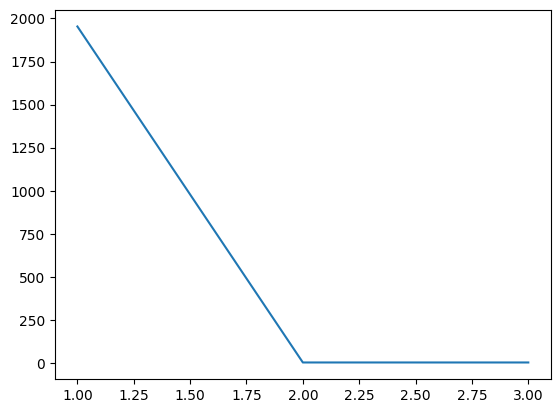

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
x = [1, 2, 3]
time_res = [1953.371933221817, 3.1771461963653564, 3.141115188598633]
plt.plot (x, time_res)
plt.show()
plt.savefig('laba4plot.png')